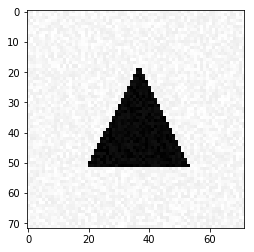

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]





In [59]:
im.shape
#72x72=5184 vector column

(5184,)

In [62]:
3. #Simple Classification 

#training set of images of simple geometric shapes (rectangle, disk, triangle) centered in the images by calling the function

[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [60]:
#linear classifier in Keras to classify a image into one of the three possible categories (i.e. rectangle, disk, triangle)

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import keras
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import np_utils

from keras.layers import Dropout
from keras.layers import Conv2D, Flatten, MaxPool2D
from keras.models import load_model
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.models import Input, Model
from keras.layers import UpSampling2D
from sklearn.preprocessing import normalize





In [64]:
#shape of data
X_train.shape

(300, 5184)

In [ ]:
#classifier with SGD
#transform first Y_Train into categorical data 0,1,2 shapes are now permutation of (1,0,0) 
target=np_utils.to_categorical(Y_train,3) 

In [67]:
#define model
model=Sequential() 

n_cols=X_train.shape[1] #see input shape

#first layer 
model.add(Dense(70, activation='relu', input_shape = (n_cols,)))
#output layer
model.add(Dense(3, activation='softmax',input_shape = (n_cols,))) #3 because 3 categories, number of nodes in the output layer should be the same as the number of possible outputs 
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# Fit the model
model.fit(X_train,target,epochs=50,validation_split=0.3) #could also add parameters batch_size and a early_stopping callbacks


Train on 210 samples, validate on 90 samples
Epoch 1/50
210/210 [==============================] - 0s - loss: 1.6256 - acc: 0.3333 - val_loss: 1.1013 - val_acc: 0.3333
Epoch 2/50
210/210 [==============================] - 0s - loss: 1.0968 - acc: 0.3619 - val_loss: 1.1069 - val_acc: 0.2889
Epoch 3/50
210/210 [==============================] - 0s - loss: 1.0933 - acc: 0.3619 - val_loss: 1.1028 - val_acc: 0.3222
Epoch 4/50
210/210 [==============================] - 0s - loss: 1.0905 - acc: 0.3524 - val_loss: 1.1059 - val_acc: 0.3222
Epoch 5/50
210/210 [==============================] - 0s - loss: 1.0823 - acc: 0.3619 - val_loss: 1.1026 - val_acc: 0.2778
Epoch 6/50
210/210 [==============================] - 0s - loss: 1.0921 - acc: 0.3333 - val_loss: 1.1074 - val_acc: 0.3889
Epoch 7/50
210/210 [==============================] - 0s - loss: 1.0895 - acc: 0.3952 - val_loss: 1.1051 - val_acc: 0.3111
Epoch 8/50
210/210 [==============================] - 0s - loss: 1.0917 - acc: 0.3476 - val_lo

In [68]:
#check classifier 
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0.0000000e+00, 1.0729072e-18, 1.0000000e+00]], dtype=float32)

In [ ]:
#adam optimizer

#regenerate data
[X_train, Y_train] = generate_dataset_classification(300, 20)

target=np_utils.to_categorical(Y_train,3) 

n_cols=X_train.shape[1] #input shape

model2=Sequential() #define model
#first layer 
model2.add(Dense(70, activation='relu', input_shape = (n_cols,)))
#output layer
model2.add(Dense(3, activation='softmax'))
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Fit the model
model2.fit(X_train,target,epochs=50,batch_size=32)

#predictions
predictions2=model2.predict(X_train)
print(predictions2)


In [71]:
#check classifier 
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model2.predict(X_test)
#array([[0., 1., 0.]], dtype=float32)

array([[0., 1., 0.]], dtype=float32)

In [76]:
#Visualization of the Solution

w=model.get_weights()[0] #on the first sgd model, extract classifier matrix 
print(w.shape)

#Divide the weights in order to plot each column as an image
array1 = w[:,0]
array2 = w[:,1]
array3 = w[:,2]

(5184, 100)


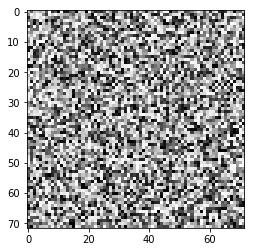

In [77]:
# first column
plt.imshow(array1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap = cm.Greys)
plt.show()

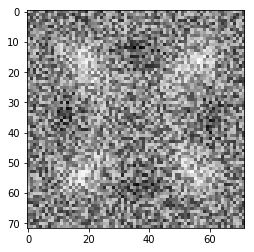

In [78]:
# second column
plt.imshow(array2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap = cm.Greys)
plt.show()

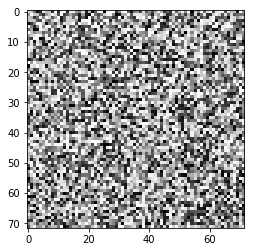

In [79]:
#third column
plt.imshow(array3.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap = cm.Greys)
plt.show()

In [88]:
#5 A More Difficult Classification Problem
#new training set
[X_train, Y_train] = generate_dataset_classification(300, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [89]:
print(X_train.shape)

(300, 5184)


In [95]:
#reshaping data
X_train = X_train.reshape([-1,72,72,1])
print(X_train.shape)
n_cols = X_train.shape[1] 
n_rows = X_train.shape[2]
print(n_cols, n_rows)

(300, 72, 72, 1)
72 72


In [ ]:
#reshaping data
X_train = X_train.reshape([-1,72,72,1])
print(X_train.shape)
n_cols = X_train.shape[1] 
n_rows = X_train.shape[2]
print(n_cols, n_rows)


In [97]:

target=np_utils.to_categorical(Y_train,3) 

conv=Sequential()
conv.add(Conv2D(16, kernel_size=(5,5),activation='relu',input_shape=(72,72,1)))
conv.add(MaxPooling2D(pool_size=(2,2),padding='same'))
conv.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
conv.add(MaxPooling2D(pool_size=(2,2),padding='same'))
conv.add(Flatten()) #Connect convolutional layer to dense layer                 
conv.add(Dense(3, activation='softmax'))  
           
conv.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 
conv.summary
conv.fit(X_train, target,  epochs=30, batch_size = 32,validation_split = 0.3)



(300, 72, 72, 1)
72 72
Train on 210 samples, validate on 90 samples
Epoch 1/50
210/210 [==============================] - 2s - loss: 1.1759 - acc: 0.3286 - val_loss: 1.0630 - val_acc: 0.3667
Epoch 2/50
210/210 [==============================] - 2s - loss: 1.0397 - acc: 0.5476 - val_loss: 1.0244 - val_acc: 0.5556
Epoch 3/50
210/210 [==============================] - 2s - loss: 0.9654 - acc: 0.6048 - val_loss: 0.9210 - val_acc: 0.5889
Epoch 4/50
210/210 [==============================] - 1s - loss: 0.8171 - acc: 0.6905 - val_loss: 0.7371 - val_acc: 0.7000
Epoch 5/50
210/210 [==============================] - 1s - loss: 0.6860 - acc: 0.7667 - val_loss: 0.7645 - val_acc: 0.5889
Epoch 6/50
210/210 [==============================] - 1s - loss: 0.6428 - acc: 0.7333 - val_loss: 0.6375 - val_acc: 0.7222
Epoch 7/50
210/210 [==============================] - 1s - loss: 0.5343 - acc: 0.8238 - val_loss: 0.6746 - val_acc: 0.6222
Epoch 8/50
210/210 [==============================] - 4s - loss: 0.4670

In [98]:
#test set generation

[X_test, Y_test] = generate_test_set_classification()

#Reshape the data
X_test = X_test.reshape([-1,72,72,1])

#Evaluate test set
conv.evaluate(X_test, Y_test)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 0s     


[1.0580699825286866, 0.7299999992052714]

In [100]:
#Regression
[X_train, Y_train] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


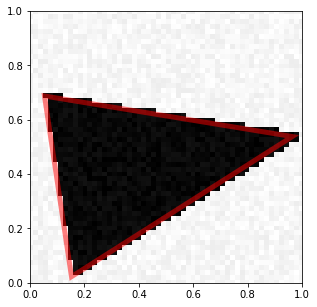

In [101]:
visualize_prediction(X_train[0], Y_train[0])

In [103]:
#Reshape X_train
X_train = X_train.reshape([-1, 72,72,1])

#some combinations 
reg = Sequential() #Initialise the model
reg.add(Conv2D(32, kernel_size = 5, activation='relu',  input_shape = (72,72,1)))
reg.add(MaxPooling2D(2))
reg.add(Conv2D(16, kernel_size = 5, activation='relu',  input_shape = (72,72,1)))
reg.add(MaxPool2D(2))
reg.add(Conv2D(16, kernel_size = 5, activation='relu',  input_shape = (72,72,1)))
reg.add(Flatten())
reg.add(BatchNormalization()) #Batch normalize
reg.add(Dropout(0.2))
reg.add(Dense(6,)) #output layer

reg.compile(loss='mean_squared_error',  optimizer='adam', metrics=['mean_absolute_error'])

In [104]:
Y_train = normalize(Y_train)

In [108]:
#reg
train = reg.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
300/300 [==============================] - 2s - loss: 0.0273 - mean_absolute_error: 0.1369     
Epoch 2/20
300/300 [==============================] - 2s - loss: 0.0272 - mean_absolute_error: 0.1349     
Epoch 3/20
300/300 [==============================] - 2s - loss: 0.0270 - mean_absolute_error: 0.1342     
Epoch 4/20
300/300 [==============================] - 2s - loss: 0.0265 - mean_absolute_error: 0.1337     
Epoch 5/20
300/300 [==============================] - 2s - loss: 0.0256 - mean_absolute_error: 0.1312     
Epoch 6/20
300/300 [==============================] - 2s - loss: 0.0257 - mean_absolute_error: 0.1303     
Epoch 7/20
300/300 [==============================] - 2s - loss: 0.0244 - mean_absolute_error: 0.1279     
Epoch 8/20
300/300 [==============================] - 2s - loss: 0.0245 - mean_absolute_error: 0.1277     
Epoch 9/20
300/300 [==============================] - 2s - loss: 0.0240 - mean_absolute_error: 0.1263     
Epoch 10/20
300/300 [================

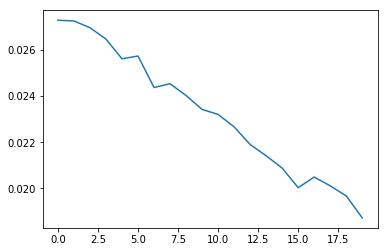

In [113]:
#Plot
plt.plot(train.history['loss'])


In [114]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [115]:
#Reshape X_test, normalize Y_test
X_test = X_test.reshape([-1, 72,72,1])
Y_test = normalize(Y_test)

In [121]:
#normalized prediction
Y_pred = reg.predict(X_test)
Y_pred = normalize(Y_pred)

In [118]:
#evaluation 
reg.evaluate(X_test, Y_test)

288/300 [===========================>..] - ETA: 0s

[0.038270286669333776, 0.16436104277769725]

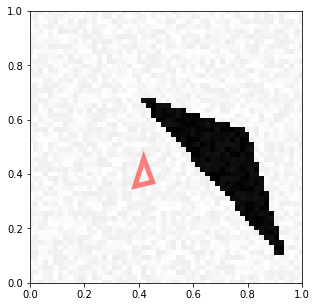

In [126]:
visualize_prediction(X_test[5], Y_pred[5])

In [127]:
#Image Denoising

#Generate pair of images, one with noise the other without
def generate_a_drawing_n(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_n = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata_n, imdata

def generate_a_rectangle_n(free_location=False):
    noise = np.random.randint(0,100) #Make some noise
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_n(figsize, U, V, noise)


def generate_a_disk_n(free_location=False):
    noise = np.random.randint(0,100) #Make some noise
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_n(figsize, U, V, noise)

def generate_a_triangle_n(free_location=False):
    noise = np.random.randint(0,100) #Make some noise
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing_n(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_classification_n(nb_samples, free_location=False):
    noise = np.random.randint(0,100) #Make some noise
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,2,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle_n(free_location)
        elif category == 1: 
            X[i] = generate_a_disk_n(free_location)
        else:
            [X[i], V] = generate_a_triangle_n(free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [151]:
#Generate the training set
training = generate_dataset_classification_n(500)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
